## Introduction

This is a project launched at Codecademy and it is a part of Data Scientist Career Path. More information [here](https://www.codecademy.com/learn/paths/data-science)

#### Task 1

* Import Pandas library
* Import NumPy library
* Import Matplotlib library
* Import Seaborn library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 2

* Use _read_csv_ method to read the raw data in the CSV file into a _data frame_
* Use _head()_ method of the data frame to show the first five rows of the data

In [2]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


#### Task 3

* _info()_ method to get further details of the data type for each variable in our dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


#### Task 4 -  Measure of Center

In [4]:
price = df['Price']
print(price)

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63018     566000.0
63019     500000.0
63020     545000.0
63021          NaN
63022          NaN
Name: Price, Length: 63023, dtype: float64


In [5]:
average = df['Price'].mean()
median = df['Price'].median()
print(average)
print(median)

997898.2414882415
830000.0


#### Task 5 -  Measure of Standard Deviation

In [6]:
std = df['Price'].std()
print(std)

593498.9190372757


#### Task 6 -  Graphical way to show the numerical data distribution

**Boxplot**
* The minimum
* The 25th percentile or the first quartile (Q1)
* The median
* The 75th percentile or the third quartile (Q3)
* The maximum

* A magic function that enables our graph rendered in the Jupyter Notebook
* Set a Seaborn theme
* Set the figure size of the plot
* Use Seaborn boxplot() method to generate a boxplot. I set the “Price” as the inputs for plotting data. The “v” value in parameter “orient” is to render our boxplot in a vertical style.

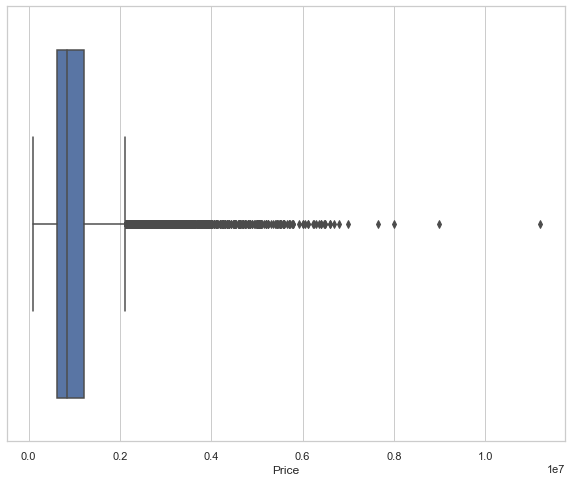

In [7]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Price', data=df, orient="v")

#### Task 7

* In fact, there are three different types of houses in our dataset which are “H” — House, “U” — Unit and “T” — Townhouse. I can create a box plot for each type of house. To do so, I just need to add another parameter, “y” in our Seaborn boxplot() method.

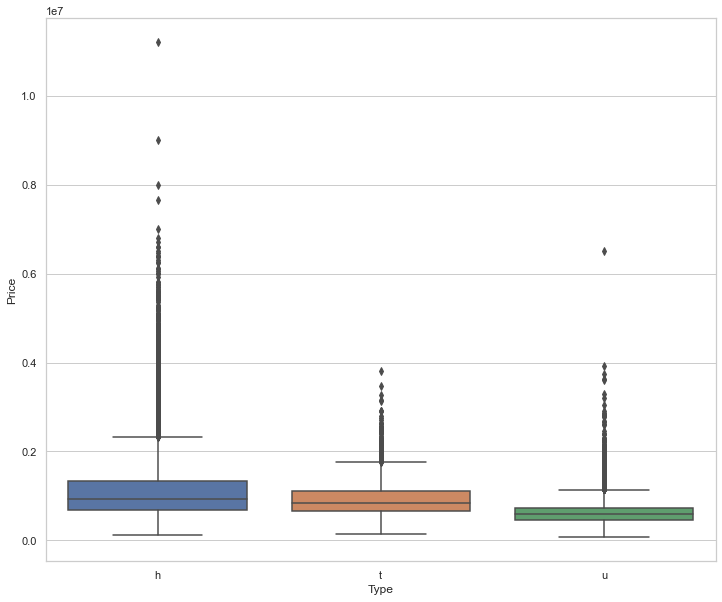

In [8]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Type', y='Price', data=df, orient="v")

#### Task 8

**Histogram**

* First is a necessary step to use _dropna()_ method to remove all the null values from the column “Price” in our housing dataset. Seaborn won’t be able to generate a histogram if there is any null value exist in a column
* Set the figure size of the histogram plot.
* _distplot()_ method to generate the histogram. There is only one required input which is the filtered housing price data (without any null values).

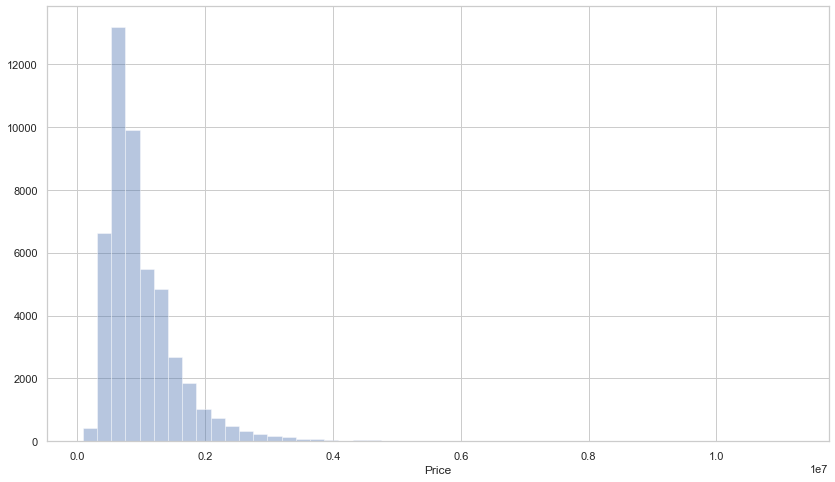

In [9]:
filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Price'], kde=False)

#### Task 9 - Pie Chart

**What is the proportion of each type of house (h - house, t — townhouse and u —
unit) in our dataset?**

**Which region has the highest number of property sales?**

The first question could be addressed by drawing a Pie Chart while a Bar Chart might
be a good option to address the second question.

In [10]:
print(df['Type'].unique())

['h' 't' 'u']


* Use Pandas method _value_counts()_ to get the frequency for each house type
* Create a new dataframe = df2. This new dataframe has only a single column, _house_type_ to hold the count number of each house type, _type_counts_
* Assign column name, _house_type_ to parameter “y”. This enables the Pandas _pie()_ method to automatically generate a Pie chart based on the count number of each house type. The parameter “autopct” is enabled to show the percentage of each house type in the Pie Chart

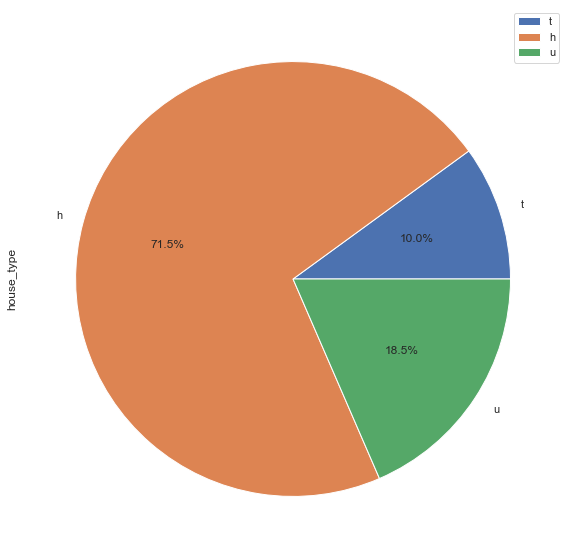

In [11]:
type_counts = df['Type'].value_counts()
df2 = pd.DataFrame(
                    {'house_type': type_counts}, 
                   index = ['t', 'h', 'u']
                  )
df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

#### Task 10 - Bar Chart

In [12]:
print(df['Regionname'].unique())

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'South-Eastern Metropolitan' 'Eastern Metropolitan' 'Northern Victoria'
 'Western Victoria' 'Eastern Victoria']


* Set the Seaborn theme to “darkgrid” and set the figure size of plot
* Assign the categorical variable “Regionname” to the parameter “x”. Assign the plotting dataset, “df”, to the parameter “data”. The Seaborn _countplot()_ method will automatically capture the number of occurrences of every region and render a bar chart

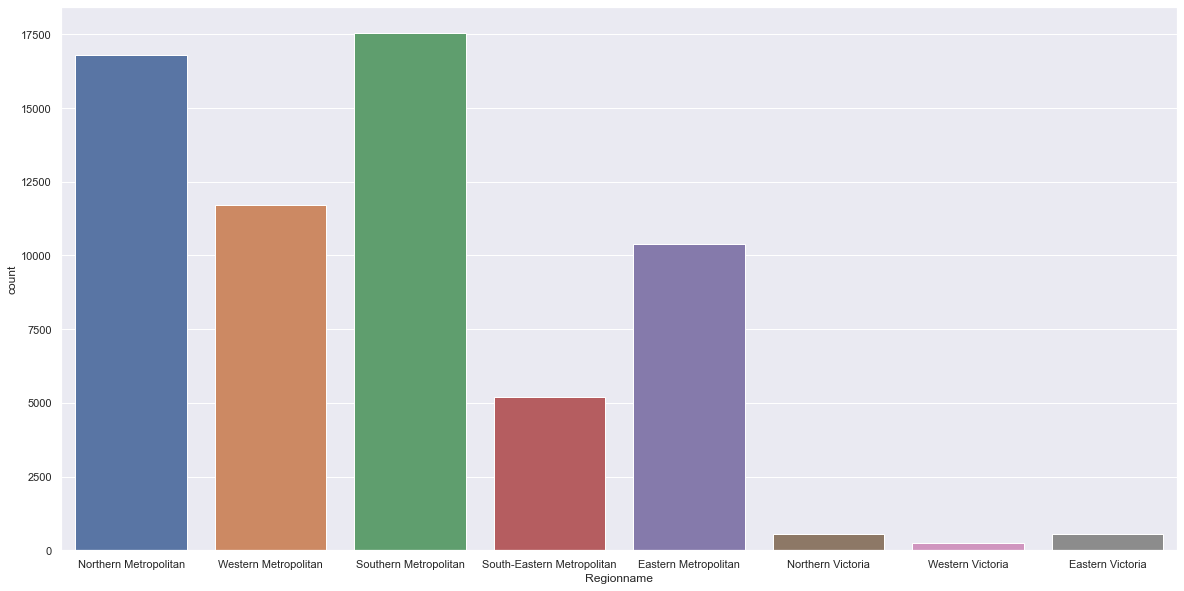

In [13]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Regionname', data=df)